In [87]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler

from scipy.misc import imread

import glob
from skimage.feature import hog

%matplotlib inline

In [88]:
image = mpimg.imread('./test_images/test1.jpg')

In [89]:
def show_images(img1, title1, img2=None, title2=None):    
    # Visualize undistortion
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    f.subplots_adjust(hspace = .2, wspace=.05)
    ax1.imshow(img1)
    ax1.set_title(title1, fontsize=30)    
    ax2.imshow(img2)
    ax2.set_title(title2, fontsize=30)

In [90]:
# def show_image(img1, title1):    
#     # Visualize undistortion
#     f, (ax1, ax2) = plt.subplots(1, 1, figsize=(20,10))
#     f.subplots_adjust(hspace = .2, wspace=.05)
#     ax1.imshow(img1)
#     ax1.set_title(title1, fontsize=30)    
#     #ax2.imshow(img2)
#     #ax2.set_title(title2, fontsize=30)

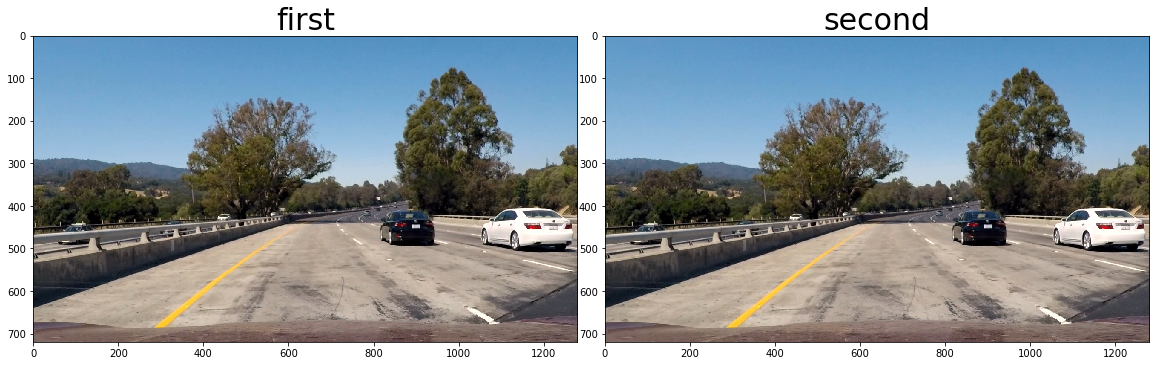

In [91]:
show_images(image, 'first', image, 'second')

In [92]:
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # make a copy of the image
    draw_img = np.copy(img)
    # draw each bounding box on your image copy using cv2.rectangle()
    # return the image copy with boxes drawn
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(draw_img, bbox[0], bbox[1], color, thick)
    return draw_img # Change this line to return image copy with boxes


In [93]:
def test_draw_boxes(image):
    # Add bounding boxes in this format, these are just example coordinates.
    bboxes = [((100, 100), (200, 200)), ((300, 300), (400, 400))]
    result = draw_boxes(image, bboxes)
    show_images(image, 'first', result, 'second')

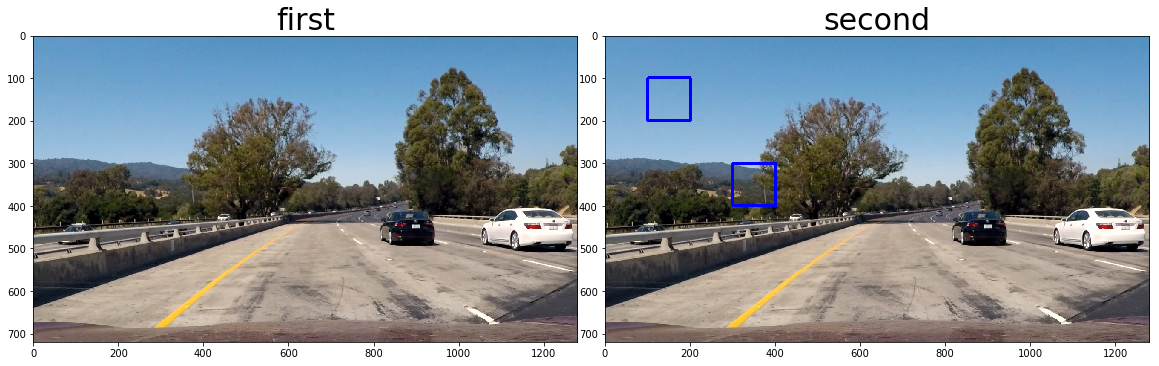

In [94]:
test_draw_boxes(image)

In [95]:
# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the RGB channels separately
    rhist = np.histogram(image[:,:,0], bins=32, range=(0, 256))
    ghist = np.histogram(image[:,:,1], bins=32, range=(0, 256))
    bhist = np.histogram(image[:,:,2], bins=32, range=(0, 256))
    # Generating bin centers
    bin_edges = rhist[1]
    bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((rhist[0], ghist[0], bhist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return rhist, ghist, bhist, bin_centers, hist_features
    
#rh, gh, bh, bincen, feature_vec = color_hist(image, nbins=32, bins_range=(0, 256))

In [96]:
def test_hist(image):
    rh, gh, bh, bincen, feature_vec = color_hist(image, nbins=32, bins_range=(0, 256))
    fig = plt.figure(figsize=(12,3))
    plt.subplot(131)
    plt.bar(bincen, rh[0])
    plt.xlim(0, 256)
    plt.title('R Histogram')
    plt.subplot(132)
    plt.bar(bincen, gh[0])
    plt.xlim(0, 256)
    plt.title('G Histogram')
    plt.subplot(133)
    plt.bar(bincen, bh[0])
    plt.xlim(0, 256)
    plt.title('B Histogram')
    fig.tight_layout()

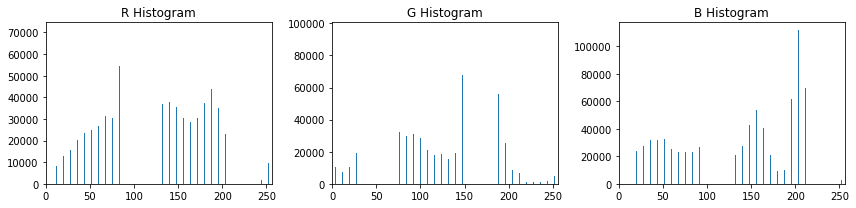

In [97]:
test_hist(image)

In [98]:
def bin_spatial(img, color_space='RGB', size=(32, 32)):
    # Convert image to new color space (if specified)
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)             
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(feature_image, size).ravel() 
    # Return the feature vector
    return features

In [99]:
def test_bin_spatial(image):
    feature_vec = bin_spatial(image, color_space='RGB', size=(32, 32))

    # Plot features
    plt.plot(feature_vec)
    plt.title('Spatially Binned Features')

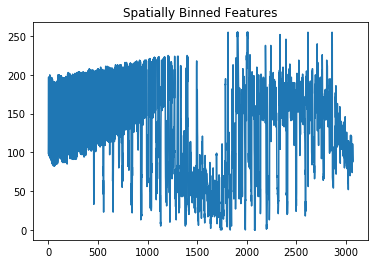

In [100]:
test_bin_spatial(image)

In [101]:
def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=True):
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=False, 
                                  visualise=True, feature_vector=False)
        return features, hog_image
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=False, 
                       visualise=False, feature_vector=feature_vec)
        return features

In [102]:
def test_get_hog_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # Define HOG parameters
    orient = 9
    pix_per_cell = 8
    cell_per_block = 2
    # Call our function with vis=True to see an image output
    features, hog_image = get_hog_features(gray, orient, 
                            pix_per_cell, cell_per_block, 
                            vis=True, feature_vec=False)

    show_images(image, 'Orig', hog_image, 'HOG')

#     # Plot the examples
#     fig = plt.figure()
#     plt.subplot(121)
#     plt.imshow(image, cmap='gray')
#     plt.title('Example Car Image')
#     plt.subplot(122)
#     plt.imshow(hog_image, cmap='gray')
#     plt.title('HOG Visualization')

/Users/seth.bunke/anaconda/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


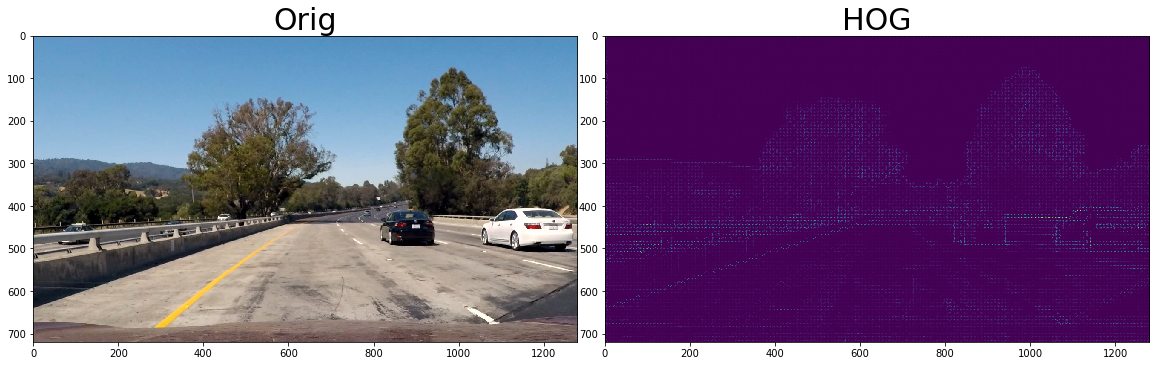

In [103]:
test_get_hog_features(image)

In [104]:
def extract_features(imgs, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256)):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        # Read in each one by one
        image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        if cspace != 'RGB':
            if cspace == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif cspace == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif cspace == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif cspace == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
        else: feature_image = np.copy(image)      
        # Apply bin_spatial() to get spatial color features
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        # Apply color_hist() also with a color space option now
        hist_features = color_hist(feature_image, nbins=hist_bins, bins_range=hist_range)
        # Append the new feature vector to the features list
        features.append(np.concatenate((spatial_features, hist_features)))
    # Return list of feature vectors
    return features

In [105]:
def scale_and_train(features1, features2):
    # Create an array stack of feature vectors
    X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X)
    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)
    
    # Split up data into randomized training and test sets
    rand_state = np.random.randint(0, 100)
    X_train, X_test, y_train, y_test = train_test_split(
        scaled_X, y, test_size=0.2, random_state=rand_state)

    print('Using spatial binning of:',spatial,
        'and', histbin,'histogram bins')
    print('Feature vector length:', len(X_train[0]))
    # Use a linear SVC 
    svc = LinearSVC()
    # Check the training time for the SVC
    t=time.time()
    svc.fit(X_train, y_train)
    t2 = time.time()
    print(round(t2-t, 2), 'Seconds to train SVC...')
    # Check the score of the SVC
    print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
    # Check the prediction time for a single sample
    t=time.time()
    n_predict = 10
    print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
    print('For these',n_predict, 'labels: ', y_test[0:n_predict])
    t2 = time.time()
    print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')

In [106]:
# def read_files():
#     base_folder = './images/'
#     # Read in car and non-car images
#     images = glob.glob('*.jpeg')
#     car_folders = ['KITTI_extracted', 'GTI_Right','GTI_Left','GTI_Middle','GTI_Far']
#     non_car_folders = ['GTI', 'Extras']
#     cars = []
#     notcars = []
    
#     for folder in car_folders:
#         images = glob.glob(base_folder + folder + '*.jpeg')
#         cars.append(images)
    
#     images = []
    
#     for folder in non_car_folders:
#         images = glob.glob(base_folder + folder + '*.jpeg')
#         notcars.append(images)
        
#     return (cars, notcars)
    
# #     for image in images:
# #         if 'image' in image or 'extra' in image:
# #             notcars.append(image)
# #         else:
# #             cars.append(image)

In [107]:
#cars, notcars = read_files()

In [108]:
#len(cars)

In [113]:
vehicle_imgs, nonvehicle_imgs = [], []
vehicle_paths = glob.glob('./images/vehicles/*/*.png')
nonvehicle_paths = glob.glob('./images/non-vehicles/*/*.png')

for path in vehicle_paths: vehicle_imgs.append(imread(path))
for path in nonvehicle_paths: nonvehicle_imgs.append(imread(path))

vehicle_imgs, nonvehicle_imgs = np.asarray(vehicle_imgs), np.asarray(nonvehicle_imgs)
total_vehicles, total_nonvehicles = vehicle_imgs.shape[0], nonvehicle_imgs.shape[0]


In [111]:
print('Vehicle count: ' + str(total_vehicles) + ' Non-Vehicle', str(total_nonvehicles))

8792


In [115]:
def show_images1(imgs, per_row = 3, per_col = 2, W = 10, H = 5, tdpi = 80):
      
    fig, ax = plt.subplots(per_col, per_row, figsize = (W, H), dpi = tdpi)
    ax = ax.ravel()
  
    for i in range(len(imgs)):
        img = imgs[i]
        ax[i].imshow(img)
  
    for i in range(per_row * per_col):
        ax[i].axis('off')


def box_boundaries1(box):
    x1, y1 = box[0], box[1]
    x2, y2 = box[0] + box[2], box[1] + box[2]  
    return x1, y1, x2, y2

def put_boxes(frame, boxes, color = (255, 0, 0), thickness = 10):
    
    out_img = frame.copy()

    for box in boxes:
        x1, y1, x2, y2 = box_boundaries(box)    
        cv2.rectangle(out_img, (x1, y1), (x2, y2), color, thickness)
    
    return out_img